# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [42]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [43]:

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [44]:
image = imread('data/image.jpg')


In [45]:
image = imread(r"C:\Users\mareg\OneDrive\Imágenes\Saved Pictures\photo-1533450718592-29d45635f0a9.jpg")

In [46]:
image

array([[[225, 203, 190],
        [225, 203, 190],
        [225, 203, 190],
        ...,
        [135, 115,  52],
        [134, 114,  51],
        [134, 114,  53]],

       [[220, 198, 185],
        [220, 198, 185],
        [220, 198, 185],
        ...,
        [136, 116,  53],
        [135, 115,  52],
        [135, 115,  54]],

       [[213, 191, 177],
        [213, 191, 177],
        [213, 191, 177],
        ...,
        [138, 118,  55],
        [137, 117,  54],
        [137, 117,  54]],

       ...,

       [[ 67,  43,  19],
        [ 79,  55,  31],
        [108,  84,  60],
        ...,
        [ 82, 111, 145],
        [ 83, 112, 146],
        [ 84, 113, 147]],

       [[ 53,  31,   8],
        [ 81,  59,  36],
        [107,  85,  61],
        ...,
        [ 83, 112, 146],
        [ 84, 113, 147],
        [ 85, 114, 148]],

       [[ 63,  41,  18],
        [ 95,  73,  50],
        [102,  80,  56],
        ...,
        [ 83, 112, 146],
        [ 84, 113, 147],
        [ 85, 114, 148]]

Analizala

Muestra la imagen para ver que se ha cargado bien

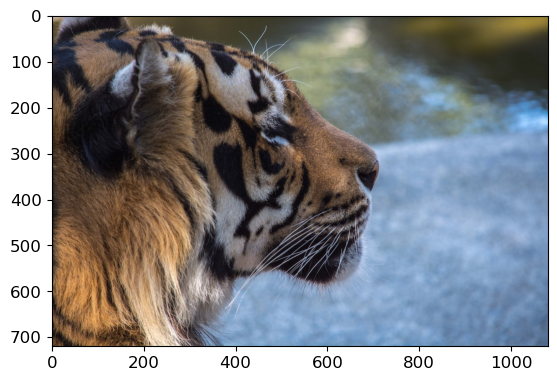

In [47]:
plt.imshow(image)

In [48]:
image.shape

(720, 1080, 3)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [49]:
# Transformar la imagen a una forma (alto x ancho, color)
imagen_transformada = image.reshape(-1, 3)
print(imagen_transformada.shape)

(777600, 3)


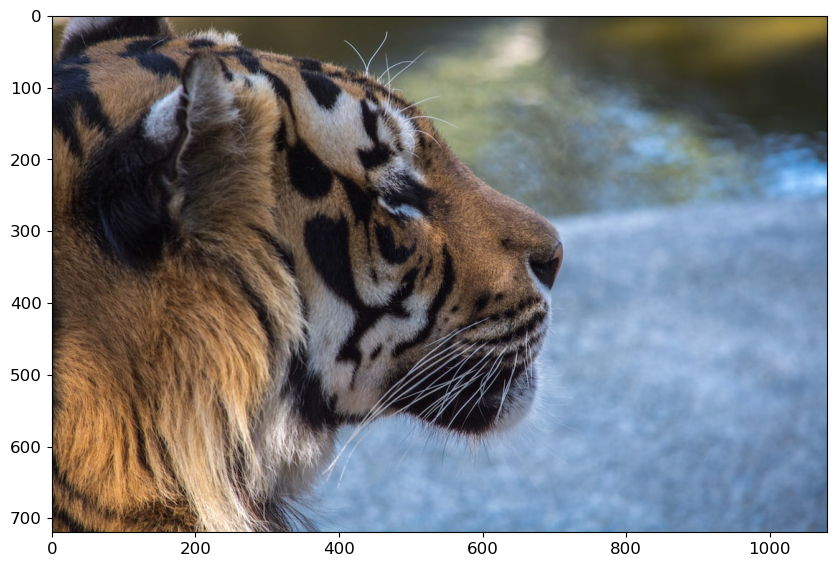

In [50]:
plt.figure(figsize=(10, 8))  
plt.imshow(image)
plt.show()

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [51]:
seed = 42

In [52]:
#X = image.reshape(-1, 3)
#kmeans = KMeans(n_clusters=10, random_state=seed).fit(X)

In [53]:
# Datos del ejemplo anterior
alto = 720
ancho = 1080
color = 3
k = 8


# Transformar la imagen a una forma (alto x ancho, color)
imagen_transformada = image.reshape(alto * ancho, color)

# Aplicar el algoritmo K-means
kmeans = KMeans(n_clusters=k, random_state=seed)
kmeans.fit(imagen_transformada)



c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


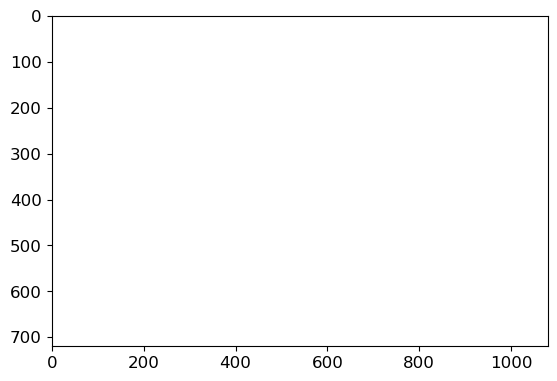

In [54]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
#print("segmented_img:", segmented_img)

plt.imshow(segmented_img)

In [55]:
# Obtener las etiquetas de los centroides para cada píxel
etiquetas = kmeans.labels_

# Obtener los centroides
centroides = kmeans.cluster_centers_



In [56]:
# Asignar los valores de los centroides a cada píxel
imagen_segmentada = centroides[etiquetas].astype(np.uint8)

# Transformar la imagen segmentada a la forma original
imagen_segmentada = imagen_segmentada.reshape(alto, ancho, color)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

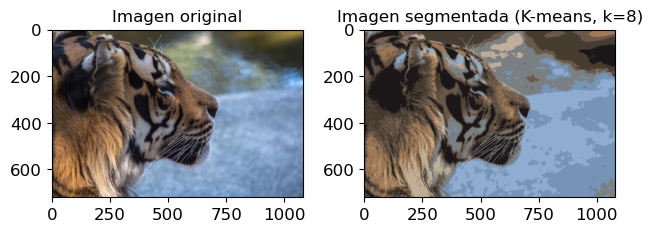

In [57]:
 #Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen original')

# Mostrar la imagen segmentada
plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)
plt.title('Imagen segmentada (K-means, k={})'.format(k))

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#### 7. Imprime y guarda en tu ordenador la imagen resultante

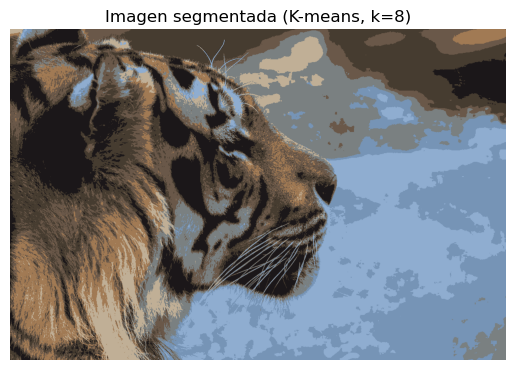

In [59]:
 
plt.imshow(imagen_segmentada)
plt.title('Imagen segmentada (K-means, k={})'.format(k))
plt.axis('off')  # Desactivar los ejes

# Guardar la imagen segmentada en el ordenador
plt.imsave('imagen_segmentada.jpg', imagen_segmentada)

# Mostrar el gráfico
plt.show()

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [60]:
def segmentar_imagen(imagen, num_colores, guardar=False, ruta_guardado=None):
    # Obtener las dimensiones de la imagen
    alto, ancho, color = imagen.shape

    # Transformar la imagen a una forma (alto x ancho, color)
    imagen_transformada = imagen.reshape(alto * ancho, color)

    # Aplicar el algoritmo K-means
    kmeans = KMeans(n_clusters=num_colores, random_state=0)
    kmeans.fit(imagen_transformada)

    # Obtener las etiquetas de los centroides para cada píxel
    etiquetas = kmeans.labels_

    # Obtener los centroides
    centroides = kmeans.cluster_centers_

    # Asignar los valores de los centroides a cada píxel
    imagen_segmentada = centroides[etiquetas].astype(np.uint8)

    # Transformar la imagen segmentada a la forma original
    imagen_segmentada = imagen_segmentada.reshape(alto, ancho, color)

    # Mostrar o guardar la imagen resultante
    if guardar:
        if ruta_guardado is None:
            ruta_guardado = 'imagen_segmentada.jpg'
        plt.imsave(ruta_guardado, imagen_segmentada)
    else:
        plt.imshow(imagen_segmentada)
        plt.axis('off')
        plt.show()

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


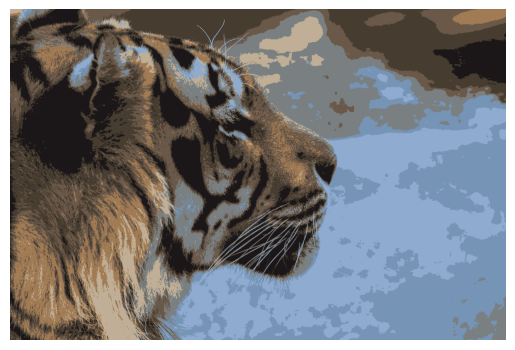

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
# Cargar la imagen
imagen = plt.imread(r"C:\Users\mareg\OneDrive\Imágenes\Saved Pictures\photo-1533450718592-29d45635f0a9.jpg")

# Segmentar la imagen con 8 colores y mostrarla por pantalla
segmentar_imagen(imagen, num_colores=8, guardar=False)

# Segmentar la imagen con 6 colores y guardarla en el ordenador
segmentar_imagen(imagen, num_colores=3, guardar=True, ruta_guardado='imagen_segmentada.jpg')

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


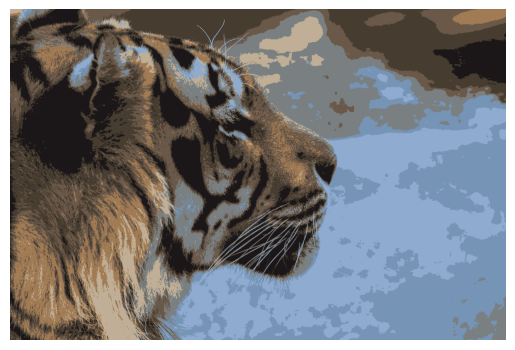

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


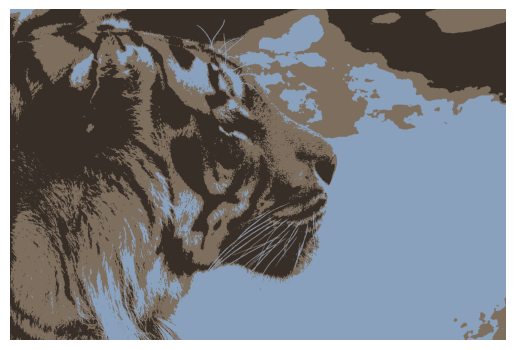

In [71]:
def segmentar_imagen(imagen, num_colores, guardar=False, ruta_guardado=None):
    # Obtener las dimensiones de la imagen
    alto, ancho, color = imagen.shape

    # Transformar la imagen a una forma (alto x ancho, color)
    imagen_transformada = imagen.reshape(alto * ancho, color)

    # Aplicar el algoritmo K-means
    kmeans = KMeans(n_clusters=num_colores, random_state=0)
    kmeans.fit(imagen_transformada)

    # Obtener las etiquetas de los centroides para cada píxel
    etiquetas = kmeans.labels_

    # Obtener los centroides
    centroides = kmeans.cluster_centers_

    # Asignar los valores de los centroides a cada píxel
    imagen_segmentada = centroides[etiquetas].astype(np.uint8)

    # Transformar la imagen segmentada a la forma original
    imagen_segmentada = imagen_segmentada.reshape(alto, ancho, color)

    # Mostrar o guardar la imagen resultante
    if guardar:
        if ruta_guardado is None:
            ruta_guardado = 'imagen_segmentada.jpg'
        plt.imsave(ruta_guardado, imagen_segmentada)

    plt.imshow(imagen_segmentada)
    plt.axis('off')
    plt.show()

# Cargar la imagen
imagen = plt.imread(r"C:\Users\mareg\OneDrive\Imágenes\Saved Pictures\photo-1533450718592-29d45635f0a9.jpg")

# Segmentar y mostrar la imagen con 8 colores
segmentar_imagen(imagen, num_colores=8)

# Segmentar y mostrar la imagen con 6 colores
segmentar_imagen(imagen, num_colores=3)
